In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('in_cart_customer.csv')
dataset.head()

,user_id,gender,age,income,customer score
0,1,Male,55,112000,11
1,3,Male,68,70000,13
2,5,Female,58,51000,5
3,8,Female,62,71000,4
4,12,Female,40,71000,6


In [4]:
# Creating matrix of feature. Clearly Gender and age is not much important for the analysis. 

X = dataset.iloc[:, [3, 4]].values

X

array([[112000,     11],
       [ 70000,     13],
       [ 51000,      5],
       ...,
       [ 73000,      5],
       [ 50000,      5],
       [ 82000,      8]])

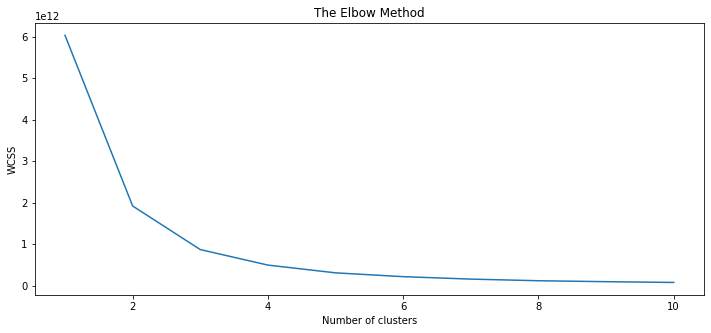

In [5]:

# -------------K-Mean Clustering:------------------

# Since in K-Mean clustering we have to assign the number of centroid by own which 
# may give wrong clusters in result so we will use advanced version of k-mean i.e., K-Means++
# which will do automatic assignment.
# One more problem is that we have to find about how many cluster we want to create to the algorithm which
# is not known to us so, we will use Elbow method to find number of clusters required visually.

# Using the elbow method to find the optimal number of clusters

%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
# Applying K-Means


kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

pd.DataFrame(y_kmeans).head()

,0
0,1
1,4
2,0
3,4
4,4


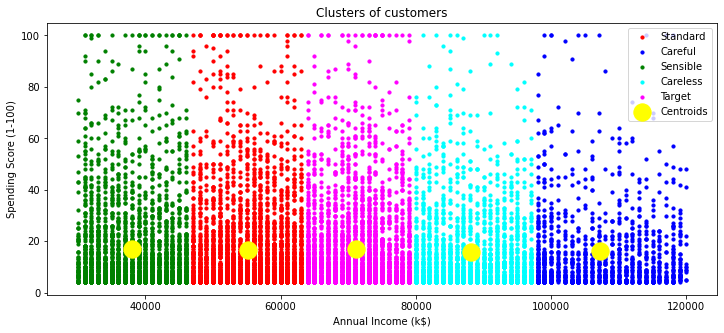

In [12]:
# So, WE have got our 5 clusters into 5 different colors. 
# We can name our clusters into some sensible name such as shown below.


plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'magenta', label = 'Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
#We will need to bin in order to create a more accurate pictures